# 🍀 NLP Going Deeper : 임베딩 내 편향성 측정 🍀

워드 임베딩 벡터들 간에는 의미적인 유사도 거리를 정량적으로 측정할 수 있다.

그렇다면 **워드 임베딩에 내포된 편향성도 정량적으로 측정할 수 있을까?** 우리는 이러한 의문에서 프로젝트를 다가가 본다.

## WEAT (Word Embedding Association Test)

**관련 논문 : https://arxiv.org/pdf/1608.07187.**

**WEAT**는 임베딩 모델의 편향을 측정하는 방식 중 하나로, Aylin Caliskan이 2016년 제안하였다.

우리는 우선 프로젝트를 시작하기에 앞서 WEAT를 어떻게 구현하는지 살펴보기로 한다.

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

print('라이브러리 import!')

라이브러리 import!


이쯤에서 두 개의 target 단어 셋 X, Y와 두 개의 attribute 단어 셋 A, B를 정의한다.

**단어 셋을 정할 때에는 두 개의 target 셋과 두 개의 attribute 셋의 크기가 각각 모두 같아야 한다.**

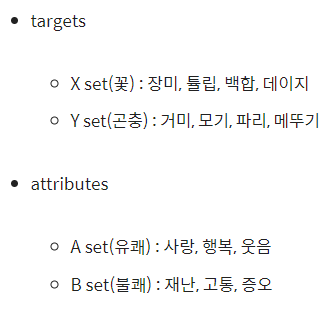

위 단어들의 임베딩 결과가 다음과 같이 나왔다고 가정한다.

In [2]:
target_X = {
    '장미': [4.1, 1.2, -2.4, 0.5, 4.1],
    '튤립': [3.1, 0.5, 3.6, 1.7, 5.8],
    '백합': [2.9, -1.3, 0.4, 1.1, 3.7],
    '데이지': [5.4, 2.5, 4.6, -1.0, 3.6]
}
target_Y = {
    '거미': [-1.5, 0.2, -0.6, -4.6, -5.3],
    '모기': [0.4, 0.7, -1.9, -4.5, -2.9],
    '파리': [0.9, 1.4, -2.3, -3.9, -4.7],
    '메뚜기': [0.7, 0.9, -0.4, -4.1, -3.9]
}
attribute_A = {
    '사랑':[2.8,  4.2, 4.3,  0.3, 5.0],
    '행복':[3.8,  3. , -1.2,  4.4, 4.9],
    '웃음':[3.7, -0.3,  1.2, -2.5, 3.9]
}
attribute_B = {
    '재난': [-0.2, -2.8, -4.7, -4.3, -4.7],
    '고통': [-4.5, -2.1,  -3.8, -3.6, -3.1],
    '증오': [-3.6, -3.3, -3.5,  -3.7, -4.4]
}

In [3]:
X = np.array([v for v in target_X.values()])
Y = np.array([v for v in target_Y.values()])
print(X)
print(Y)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [4]:
A = np.array([v for v in attribute_A.values()])
B = np.array([v for v in attribute_B.values()])
print(A)
print(B)

[[ 2.8  4.2  4.3  0.3  5. ]
 [ 3.8  3.  -1.2  4.4  4.9]
 [ 3.7 -0.3  1.2 -2.5  3.9]]
[[-0.2 -2.8 -4.7 -4.3 -4.7]
 [-4.5 -2.1 -3.8 -3.6 -3.1]
 [-3.6 -3.3 -3.5 -3.7 -4.4]]


**s('장미', A, B) 는 어떻게 계산할까요?**

이쯤에서 WEAT Score는 아래 수식으로 정의가 됩니다.

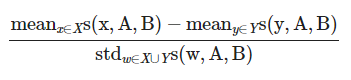

WEAT score를 계산하기 위한 식을 하나씩 살펴보자. 이 테스트는 두 벡터의 유사도를 측정하기 위해 cosine similarity를 이용한다.

cosine similarity는 두 벡터 사이의 cosine 값을 이용하여 두 벡터의 유사도를 측정한다.

두 벡터 i,j가 주어졌을 때, cosine similarity cos(θ)는 dot product와 magnitude를 사용하여 구할 수 있다.

**cos(θ)는 총 3가지 값을 갖는다.**

- cos(θ)가 1이면 두 벡터의 방향이 같음을 의미한다.
- cos(θ)가 0이면 두 벡터가 직교함을 의미한다.
- cos(θ)가 -1이면 두 벡터의 방향이 서로 반대임을 의미한다.

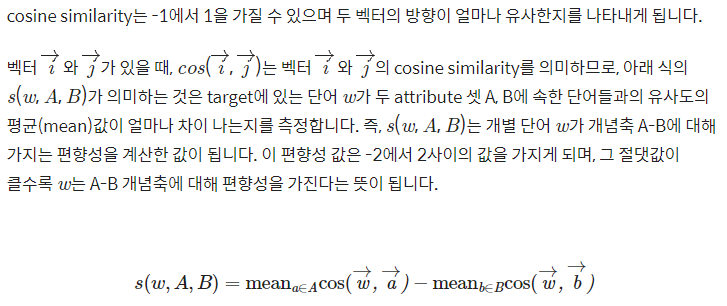

이제 WEAT Score의 다음 부분으로 넘어가 살펴보자.

WEAT Score에서 식의 분자 부분은 target X, Y에 속하는 각 단어 xx, yy들이 개념축 A-B에 대해 가지는 편향성을 각각 평균 내서 뺀 차이다.

즉, X에 속하는 단어들과 Y에 속하는 단어들이 A-B 개념축에 대해 가지는 편향성의 정도가 뚜렷이 차이가 날 수록 이 WEAT score 식의 분자값의 절댓값은 커지게 됩니다. 이 값을 X, Y에 속하는 모든 단어들이 가지는 편향성 값의 표준편차(std)로 normalize한 값이 최종 WEAT score가 됩니다.

**내용을 살펴보았으니, 이제 s('장미', A, B)는 어떻게 나오는지 살펴보자. 코사인 유사도 함수를 정의하고 활용한다.**

In [5]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

print(s(target_X['장미'], A, B))

0.6457646122337399


**WEAT score의 값이 양수이므로, target_X에 있는 '장미'라는 단어는 attribute_B(불쾌)보다 attribute_A(유쾌)와 더 가깝다는 것**을 알 수 있다. target_Y에 있는 '거미'와 attribute_A, attribute_B와의 관계도 살펴보자.

In [6]:
print(s(target_Y['거미'], A, B))

-0.794002342033094


**WEAT score의 값이 음수이므로, '거미'는 attribute_B와 더 가깝다는 것**을 알 수 있다.

그럼 target_X와 attribute_A, attribute_B 사의의 평균값, 그리고 target_Y와 attribute_A, attribute_B 사의의 평균값은 어떻게 될까?

In [7]:
print(s(X, A, B))
print(round(np.mean(s(X, A, B)), 3))

[0.29551989 0.51723181 0.26499096 0.50924109]
0.397


In [8]:
print(s(Y, A, B))
print(round(np.mean(s(Y, A, B)), 3))

[-0.44713039 -0.28310853 -0.33144878 -0.26030641]
-0.33


한편, 위에서 살펴본 WEAT Score의 수식을 파이썬으로 전체 구현하면 아래와 같다.

In [9]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

1.932


WEAT score가 매우 높게 나온 것을 알 수 있다. 즉, **꽃은 유쾌한 단어와 상대적으로 가깝고, 곤충은 불쾌한 단어와 가깝다는 것**을 수치적으로 확인할 수 있다.

이제 이를 시각적으로 확인해 보고자 한다. 이 과정을 위해 PCA를 통해 5차원이었던 벡터를 2차원으로 줄여 그림을 그린다.

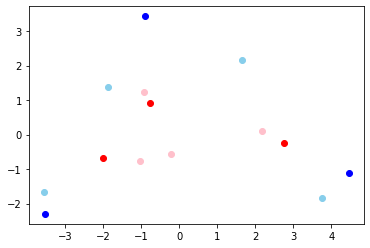

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')

위 그림을 통해 파란색 점(A)과 하늘색 점(X)이 가깝고, 빨간색 점(B)과 분홍색 점(Y)이 가깝게 표현되었음을 알 수 있다! 😄😄

## ⏰ 긴급 안내 ⏰

해당 노드의 더 깊은 부분을 다루어보려고 하였으나, 미니 해커톤으로 인해 여기까지만 하도록 하겠습니다.

만일 시간이 남게 된다면 언젠가는 다시 돌아와서 다루어 보고 싶습니다 ㅠㅠ